In [1]:
import pickle
import time
import os
from sys import platform
import numpy as np
import matplotlib.pyplot as plt
from geant3_parser import Geant3DataFile
from geant3_parser import build_train_set


In [2]:
file_name = os.path.join('data', 'shower_geant3_new.dat')
data_file=Geant3DataFile(file_name,skip_lines=3)
input,true_e,sum_e=build_train_set(data_file,50000,add_real_xy=False,normalize=True)

Time open 1.9698131084442139
Time split 0.3503389358520508


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2022-06-19 17:53:25.804932: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [25]:
#build autoencoder
input_layer=Input(shape=(123,))
encoder=Dense(64,activation='LeakyReLU')(input_layer)   #encoder
encoder=Dense(32,activation='LeakyReLU')(encoder)    #encoder
encoder=Dense(16,activation='LeakyReLU')(encoder)    #encoder
encoder=Dense(8,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(4,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(2,activation='LeakyReLU')(encoder)     #encoder
encoder=Dense(1,activation='sigmoid')(encoder)     #encoder
decoder=Dense(4,activation='LeakyReLU')(encoder)     #decoder
decoder=Dense(8,activation='LeakyReLU')(decoder)     #decoder
decoder=Dense(16,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(32,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(64,activation='LeakyReLU')(decoder)    #decoder
decoder=Dense(123,activation='tanh')(decoder) #decoder
autoencoder=Model(input_layer,decoder)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse','mae'])   #compile
autoencoder.summary()                                                                           #summary    #train
history=autoencoder.fit(input,input,epochs=20,batch_size=121,validation_split=0.2)                                                   #train  #validation_split=0.2
autoencoder.save('trained_models/autoencoder.hd5')                                                                 #save    #save



Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 123)]             0         
_________________________________________________________________
dense_78 (Dense)             (None, 64)                7936      
_________________________________________________________________
dense_79 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_80 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 10  

INFO:tensorflow:Assets written to: autoencoder.hd5/assets


INFO:tensorflow:Assets written to: autoencoder.hd5/assets


In [26]:
print(history.history)

{'loss': [0.32434824109077454, 0.2671191096305847, 0.26435646414756775, 0.26370111107826233, 0.2634793519973755, 0.2636410593986511, 0.2644183039665222, 0.2648562490940094, 0.2637855112552643, 0.263741135597229, 0.2635985016822815, 0.2633903920650482, 0.26401621103286743, 0.26339420676231384, 0.263379842042923, 0.26336470246315, 0.263916939496994, 0.26339495182037354, 0.2633655071258545, 0.2633090913295746], 'accuracy': [0.06464999914169312, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665, 0.9774749875068665], 'mse': [0.017182819545269012, 0.01831437647342682, 0.018775789067149162, 0.018815776333212852, 0.018980568274855614, 0.01859813556075096, 0.017498629167675972, 0.01878411322

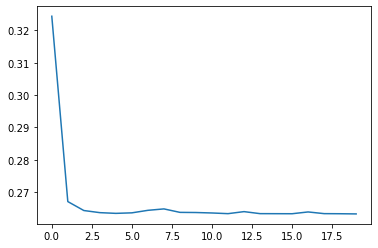

In [27]:
plt.plot(history.history['loss'])

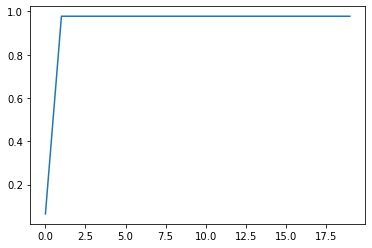

In [28]:
plt.plot(history.history['accuracy'])

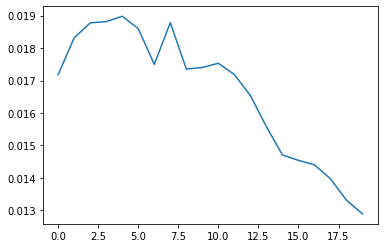

In [29]:
plt.plot(history.history['mse'])

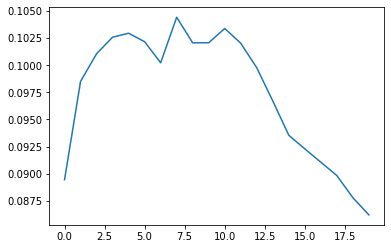

In [30]:
plt.plot(history.history['mae'])